In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
#import CSV file
df = pd.read_csv('Resources/Data/winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.drop_duplicates(keep= 'first', inplace = False)
df.dropna(axis = 'columns', how='all')
df.reset_index(drop =True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
#Features for Quality
bins = [2,6,9]
labels = ['Fair', 'Very Good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels) 
    

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Fair
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Fair
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Fair
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair


In [8]:
# Assign X (factors) and y (quality)
X = df.drop("quality", axis=1)
y = df["quality"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [9]:
df['quality'].value_counts()

Fair         1382
Very Good     217
Name: quality, dtype: int64

In [10]:
#Top5Features
top5_features= X[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'density']]

### All Features

In [11]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

# Split our data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [12]:
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       2
top       Fair
freq      1109
Name: quality, dtype: object
count      320
unique       2
top       Fair
freq       273
Name: quality, dtype: object


In [13]:
#Create a Logistic Regression Model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [14]:
 classifier.fit(x_train, y_train)

LogisticRegression()

In [15]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.8858483189992181
Testing Data Score: 0.865625


In [16]:
predictions = classifier.predict(x_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair']
First 10 Actual labels: ['Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [17]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Fair,Fair
1,Fair,Fair
2,Fair,Fair
3,Fair,Fair
4,Fair,Fair
...,...,...
315,Fair,Fair
316,Fair,Fair
317,Fair,Fair
318,Fair,Fair


In [18]:
print(classification_report(predictions,y_test ))

              precision    recall  f1-score   support

        Fair       0.97      0.89      0.92       298
   Very Good       0.28      0.59      0.38        22

    accuracy                           0.87       320
   macro avg       0.62      0.74      0.65       320
weighted avg       0.92      0.87      0.89       320



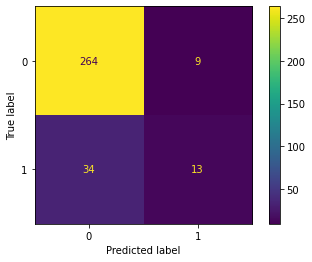

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_all_features_matrix_Logistic.jpg')

### Top 5 Features

In [20]:
x = df[top5_features.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

# Split our data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [21]:
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       2
top       Fair
freq      1109
Name: quality, dtype: object
count      320
unique       2
top       Fair
freq       273
Name: quality, dtype: object


In [22]:
#Create a Logistic Regression Model

classifier = LogisticRegression()
classifier

LogisticRegression()

In [23]:
 classifier.fit(x_train, y_train)

LogisticRegression()

In [24]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.8803752931978108
Testing Data Score: 0.859375


In [25]:
predictions = classifier.predict(x_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair']
First 10 Actual labels: ['Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [26]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Fair,Fair
1,Fair,Fair
2,Fair,Fair
3,Fair,Fair
4,Fair,Fair
...,...,...
315,Fair,Fair
316,Fair,Fair
317,Fair,Fair
318,Fair,Fair


In [27]:
print(classification_report(predictions,y_test ))

              precision    recall  f1-score   support

        Fair       0.96      0.88      0.92       298
   Very Good       0.26      0.55      0.35        22

    accuracy                           0.86       320
   macro avg       0.61      0.71      0.63       320
weighted avg       0.91      0.86      0.88       320



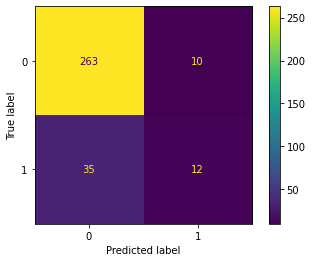

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_top5_features_confu_KNN.jpg')